# Graduate Admissions - My First Kernal


<b>Problem Statement:</b>
    
    The main goal of this problem is to predict the 'Chance of Admit' of a student in a perticular university given 
    various parameters such as:
       - GRE Scores(out of 340)
       - TOEFL Scores(out of 120)
       - University Rating(out of 5)
       - Statement of Purpose and Letter of Recommendation Strength(out of 5)
       - Undergraduate GPA(out of 10)
       - Research Experience(either 0 or 1)
    

<b>Algorithms Considered:</b>
    - Linear Regression
    - Logistic Regression
    - Support Vector Machine
    - K Nearest Neighbours
    - Decision Trees

<b>Goal:</b>
    - The main aim of this kernel is to predict the 'Chance of Admit' with high accuracy by applying various ML Algorithms 
      and then comparing their scores.
    - Adaboost technique is used to improve the performance of model.
    - Compare different models to check for best model depending on r_squared score and accuracy score

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

<b>Importing Python Packages:</b>
    - Pandas
    - Numpy
    - Matplotlib
    - Seaborn


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<b>Reading Data as CSV File:</b>

In [83]:
df = pd.read_csv('D:/Maltesh/ML and AI/Kaggle/Kaggle_Kernal/University Admit/Admission_Predict_Ver1.1.csv')

<b>Making basic Insights about given data:</b>

In [84]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [85]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [87]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


<b>Checking for any Linear Relationship between the given Parameters:</b>
    - By constructing Pairplot
    - By constructing Correlation heatmap 

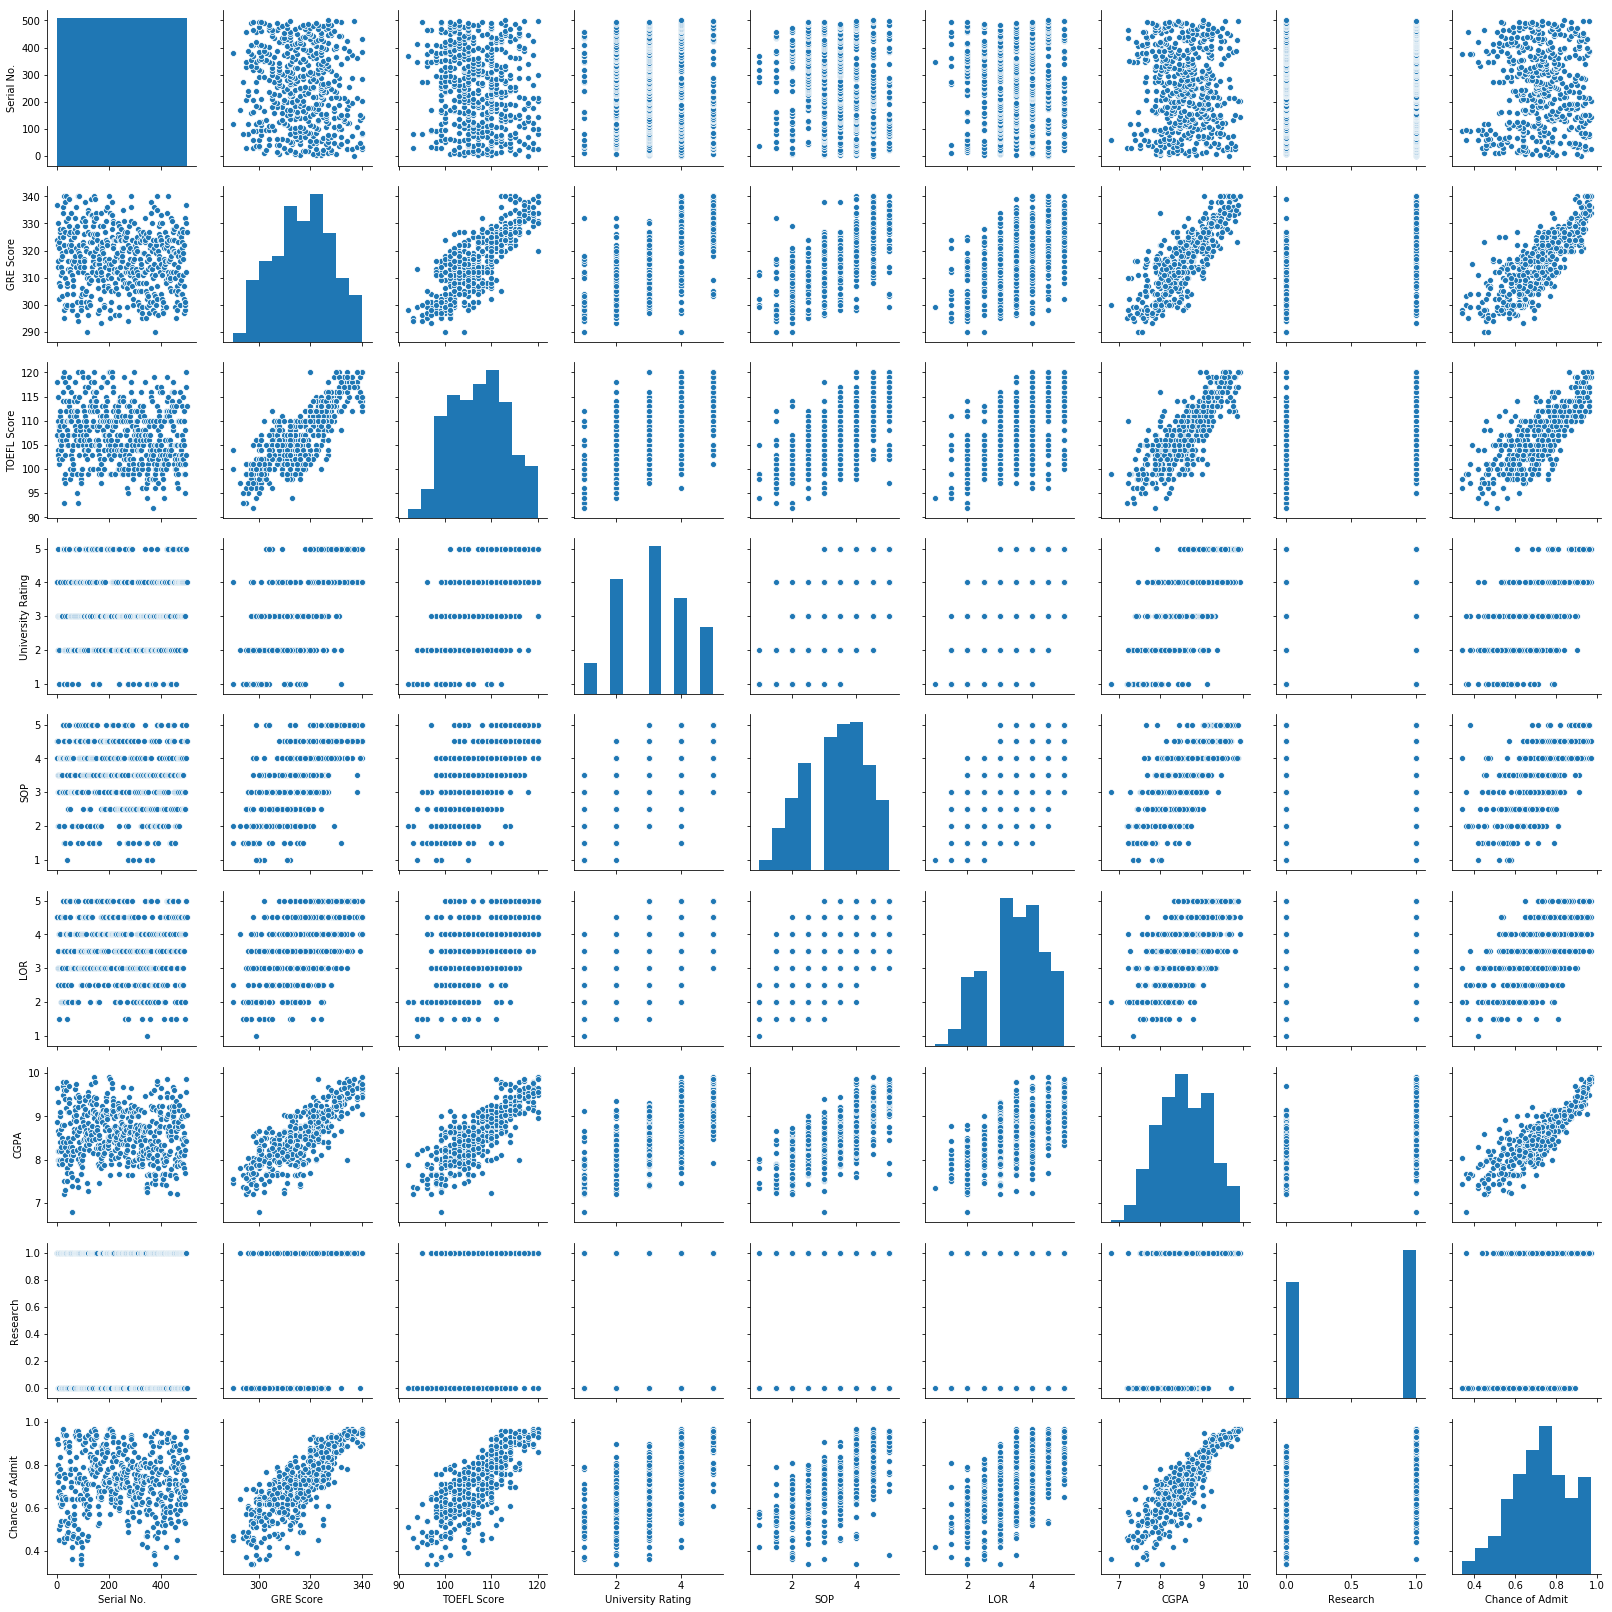

In [88]:
sns.pairplot(df)

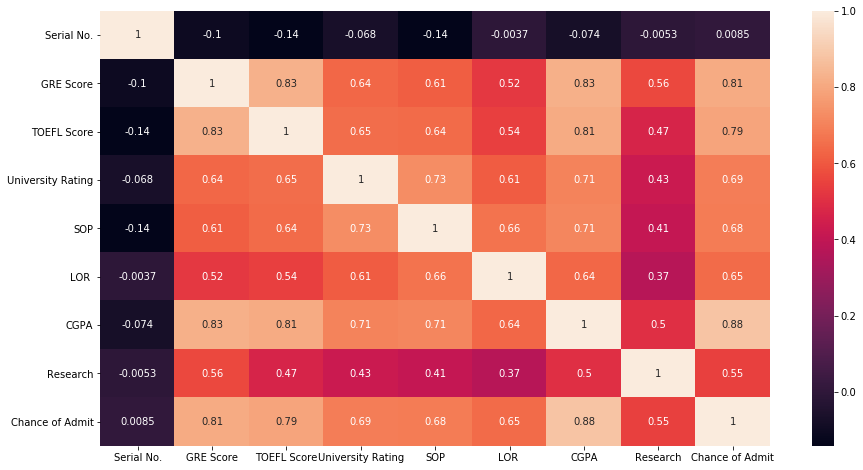

In [89]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)

<b>From above the Parameters with High Corelation against 'Chance of Admit' are:</b>
    - GRE Score
    - TOEFL Score
    - CGPA

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

<b>Distribution of Parameters:</b>

C:\Users\Maltesh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


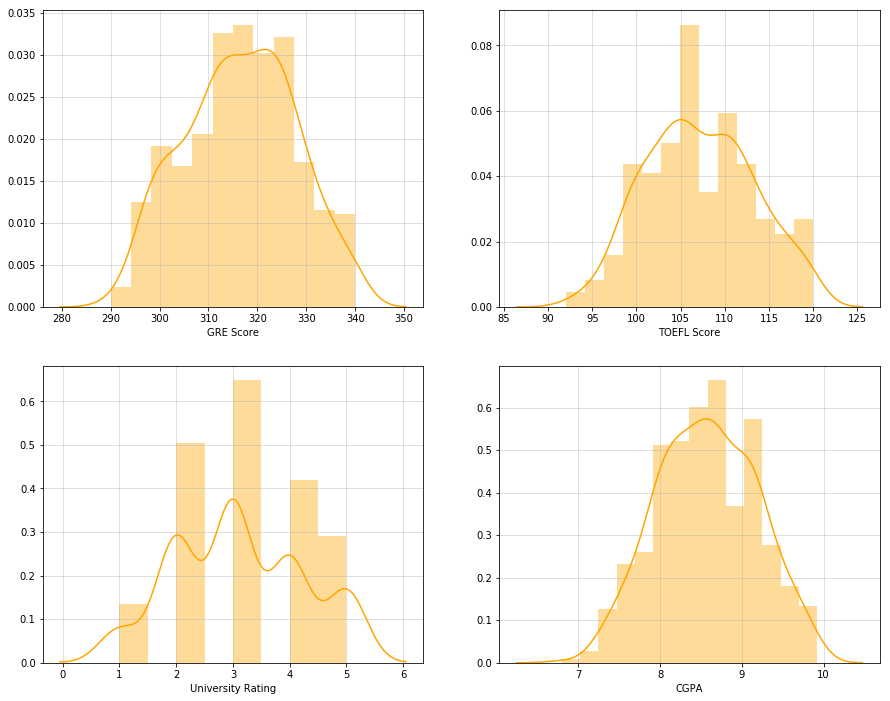

In [90]:
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
sns.distplot(df['GRE Score'], color='Orange')
plt.grid(alpha=0.5)

plt.subplot(2,2,2)
sns.distplot(df['TOEFL Score'], color='Orange')
plt.grid(alpha=0.5)

plt.subplot(2,2,3)
sns.distplot(df['University Rating'], color='Orange')
plt.grid(alpha=0.5)

plt.subplot(2,2,4)
sns.distplot(df['CGPA'], color='Orange')
plt.grid(alpha=0.5)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

<b>Analysis on Research Column:</b>

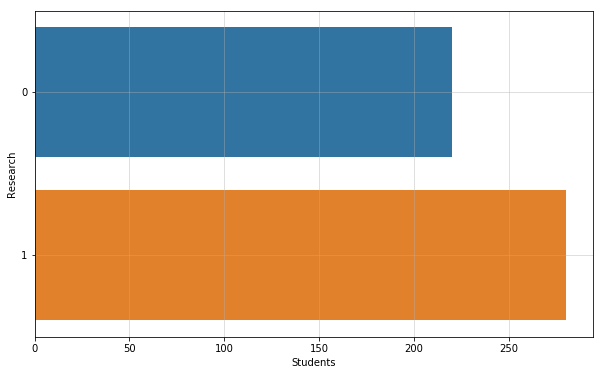

In [91]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['Research'])
plt.grid(alpha=0.5)
plt.xlabel('Students')
plt.show()

In [92]:
print("Total number of students with Research : ",(df['Research']==1).sum())
print("Total number of students with-out Research : ",len(df)-(df['Research']==1).sum())
print("Percentage of students with Research : ",round(((df['Research']==1).sum()/len(df))*100,2),'%')

Total number of students with Research :  280
Total number of students with-out Research :  220
Percentage of students with Research :  56.0 %


<b>Analysis on University Ranking:</b> 

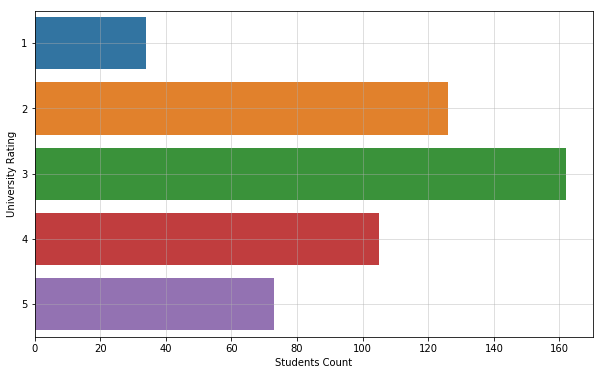

In [93]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['University Rating'])
plt.grid(alpha=0.5)
plt.xlabel('Students Count')
plt.show()

In [99]:
# IMP FOR CHACNE OF ADMIT
#df.ix[:,8]

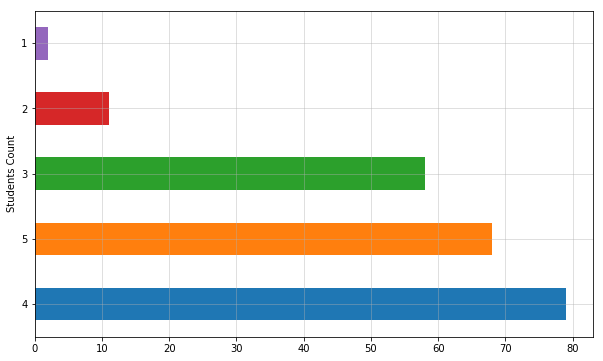

In [94]:
plt.figure(figsize=(10,6))
uni_influence = df[df["Chance of Admit"] >= 0.75]["University Rating"].value_counts()
uni_influence.plot(kind='barh')
plt.grid(alpha=0.5)
plt.ylabel('Students Count')
plt.show()

In [14]:
print('From given University Rating each university has a Student count of:')
print('University Rating 1 : ',(df['University Rating']==1).sum())
print('University Rating 2 : ',(df['University Rating']==2).sum())
print('University Rating 3 : ',(df['University Rating']==3).sum())
print('University Rating 4 : ',(df['University Rating']==4).sum())
print('University Rating 5 : ',(df['University Rating']==5).sum())

From given University Rating each university has a Student count of:
University Rating 1 :  34
University Rating 2 :  126
University Rating 3 :  162
University Rating 4 :  105
University Rating 5 :  73


In [15]:
print('From given University Rating and Student count in each university, number of Students having chance >75% of Admit:')
print('University Rating 1 : ',uni_influence.iloc[4])
print('University Rating 2 : ',uni_influence.iloc[3])
print('University Rating 3 : ',uni_influence.iloc[2])
print('University Rating 4 : ',uni_influence.iloc[0])
print('University Rating 5 : ',uni_influence.iloc[1])

From given University Rating and Student count in each university, number of Students having chance >75% of Admit:
University Rating 1 :  2
University Rating 2 :  11
University Rating 3 :  58
University Rating 4 :  79
University Rating 5 :  68


<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

<b>Mean and Standard Deviation of 'GRE Score', 'TOEFL Score', 'CGPA' has been accounted to compare students easily as the 
students with positive standard deviation tend to perform well as compared to majority of people i.e scores better than
that of mean value</b>

In [16]:
gre_avg = df['GRE Score'].mean()
gre_std = df['GRE Score'].std()
print("Maximum GRE Score : 340")
print("Average GRE Score : ",gre_avg)
print("Standard Deaviation : ",gre_std)

diff = df['GRE Score']-gre_avg
df['SD_GRE'] = diff/gre_std

Maximum GRE Score : 340
Average GRE Score :  316.472
Standard Deaviation :  11.295148372354694


In [17]:
toefl_avg = df['TOEFL Score'].mean()
toefl_std = df['TOEFL Score'].std()
print("Maximum TOEFL Score : 120")
print("Average TOEFL Score : ",toefl_avg)
print("Standard Deaviation : ",toefl_std)

diff = df['TOEFL Score']-toefl_avg
df['SD_TOEFL'] = diff/toefl_std

Maximum TOEFL Score : 120
Average TOEFL Score :  107.192
Standard Deaviation :  6.081867659564522


In [18]:
cgpa_avg = df['CGPA'].mean()
cgpa_std = df['CGPA'].std()
print("Maximum CGPA Score : 10")
print("Average CGPA Score : ",cgpa_avg)
print("Standard Deaviation : ",cgpa_std)

diff = df['CGPA']-cgpa_avg
df['SD_CGPA'] = diff/cgpa_std

Maximum CGPA Score : 10
Average CGPA Score :  8.576440000000003
Standard Deaviation :  0.6048128003332052


In [19]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,SD_GRE,SD_TOEFL,SD_CGPA
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1.817417,1.777086,1.775029
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0.666481,-0.031569,0.485373
2,3,316,104,3,3.0,3.5,8.00,1,0.72,-0.041788,-0.524839,-0.953088
3,4,322,110,3,3.5,2.5,8.67,1,0.80,0.489414,0.461700,0.154692
4,5,314,103,2,2.0,3.0,8.21,0,0.65,-0.218855,-0.689262,-0.605873


<b>Constructing Pairplot for new parameters against 'Chance of Admit':</b> 

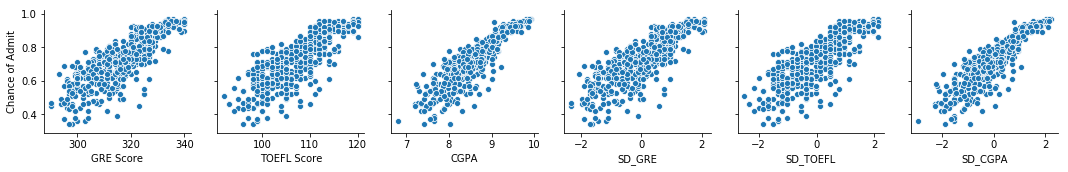

In [20]:
sns.pairplot(df, x_vars=['GRE Score','TOEFL Score','CGPA','SD_GRE','SD_TOEFL','SD_CGPA'], y_vars='Chance of Admit')

<b>Constructing Heatmap of Corelation for new parameters against 'Chance of Admit':</b> 

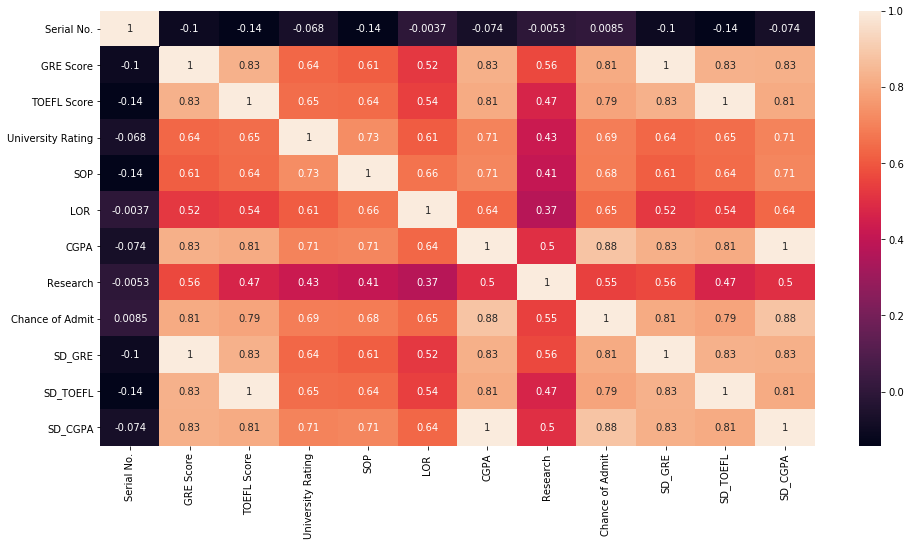

In [21]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

# Splitting Data For Training & Testing

In [22]:
x = df.drop(['Chance of Admit'], axis=1)
y = df['Chance of Admit']

In [23]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
SD_GRE               500 non-null float64
SD_TOEFL             500 non-null float64
SD_CGPA              500 non-null float64
dtypes: float64(6), int64(5)
memory usage: 43.0 KB


In [24]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

C:\Users\Maltesh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

# Applying Linear Regression Model:

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [26]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
coef = pd.DataFrame(lr.coef_, x_test.columns, columns = ['Co-efficient'])

<b>The Co-efficients for the following parameters are:</b>

In [28]:
coef

,Co-efficient
Serial No.,0.000092
GRE Score,0.002185
TOEFL Score,0.003707
University Rating,0.002134
SOP,0.004046
LOR,0.014949
CGPA,0.030212
Research,0.022565
SD_GRE,0.000193
SD_TOEFL,0.000610


<b>From above we can infer that :</b>
- If GRE Score increases by 1 then Chance of Admit will be affected by 0.002185
- If TOEFL increases by 1 then Chance of Admit will be affected by 0.003707
- If University Rating increases by 1 then Chance of Admit will be affected by 0.002134
  <br>and so on...</br>

In [29]:
y_pred_mlr = lr.predict(x_test)

In [30]:
len(x_test)

125

<b>Plotting Actual vs Predicted Values:</b>

Text(0.5,0.98,'Actual vs Predicted')

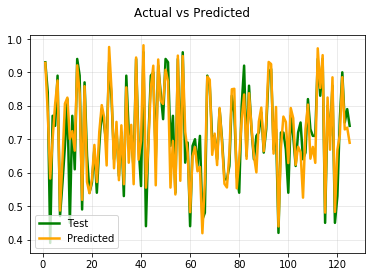

In [31]:
fig = plt.figure()
c = [i for i in range(1,126,1)]
plt.plot(c,y_test, color = 'green', linewidth = 2.5, label='Test')
plt.plot(c,y_pred_mlr, color = 'orange', linewidth = 2.5, label='Predicted')
plt.grid(alpha = 0.3)
plt.legend()
fig.suptitle('Actual vs Predicted')

<b>Calculating Error Terms:</b>

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_mlr)
r_square_score = r2_score(y_test, y_pred_mlr)

In [33]:
print('Mean Square Error = ',mse)
print('R_Square Score = ',r_square_score)

Mean Square Error =  0.00346552826078158
R_Square Score =  0.8224786393789142


Text(0.5,0.98,'Error Terms')

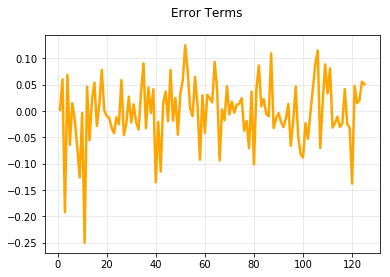

In [34]:
fig = plt.figure()
plt.plot(c,y_test-y_pred_mlr, color = 'orange', linewidth = 2.5)
plt.grid(alpha = 0.3)
fig.suptitle('Error Terms')

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

# Statistical Information using Statsmodels:

In [35]:
import statsmodels.api as sm

In [36]:
x_train_sm = x_train
x_train_sm = sm.add_constant(x_train_sm)
lml = sm.OLS(y_train, x_train_sm).fit()
lml.params

const               -0.000646
Serial No.           0.000092
GRE Score            0.000596
TOEFL Score          0.001885
University Rating    0.002134
SOP                  0.004046
LOR                  0.014949
CGPA                 0.026157
Research             0.022565
SD_GRE               0.018144
SD_TOEFL             0.011690
SD_CGPA              0.052405
dtype: float64

In [37]:
print(lml.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     224.0
Date:                Sat, 16 Feb 2019   Prob (F-statistic):          6.04e-136
Time:                        17:28:44   Log-Likelihood:                 534.19
No. Observations:                 375   AIC:                            -1050.
Df Residuals:                     366   BIC:                            -1015.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0006      0.00

<b>Re-Valuating the Data:</b>

If 'p > 0.05' for a 95% level of confidence:
- Ho : Value is not significant
- H1 : Value is significant
Since in GRE p(0.065) > 0.05 so 'we fail to reject Ho' 

In [38]:
x_new = df.drop(['Serial No.','University Rating','SOP','Chance of Admit'], axis=1)
y_new = df['Chance of Admit']

In [39]:
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new,y_new, train_size = 0.7, random_state = 100)

In [40]:
lr.fit(x_train_new, y_train_new)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
y_pred_new = lr.predict(x_test_new)

In [42]:
len(x_test_new)

150

Text(0.5,0.98,'Actual vs Predicted')

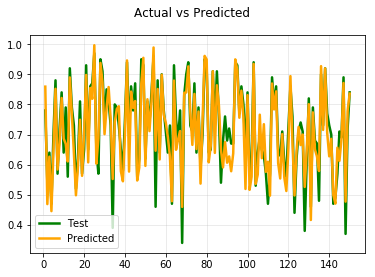

In [43]:
# Actual vs Predicted after removing GRE
fig = plt.figure()
c = [i for i in range(1,151,1)]
plt.plot(c,y_test_new, color = 'green', linewidth = 2.5, label='Test')
plt.plot(c,y_pred_new, color = 'orange', linewidth = 2.5, label='Predicted')
plt.grid(alpha = 0.3)
plt.legend()
fig.suptitle('Actual vs Predicted')

In [44]:
mse_new = mean_squared_error(y_test_new, y_pred_new)
r_square_score_new = r2_score(y_test_new, y_pred_new)
print('Mean Square Error = ',mse_new)
print('R_Square Score = ',r_square_score_new)

Mean Square Error =  0.00345026315553777
R_Square Score =  0.833588451094921


Text(0.5,0.98,'Error Terms')

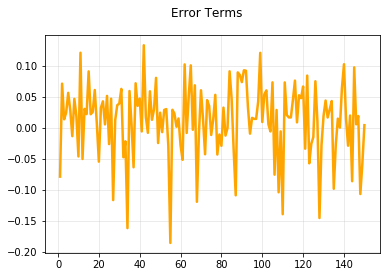

In [45]:
fig = plt.figure()
plt.plot(c,y_test_new-y_pred_new, color = 'orange', linewidth = 2.5)
plt.grid(alpha = 0.3)
fig.suptitle('Error Terms')

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

# Applying Logistic Regression Model:

In [46]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

Since Logistic Regression is a Classification model, 'Continuous Data' will not help to classify the output. Hence we need
to categorize the data into:
    - Label 1 for Chance of Admit greater or equal to 80%
    - Label 0 for Chance of Admit lesser than 80%

In [47]:
y_train_label = [1 if each > 0.8 else 0 for each in y_train]
y_test_label  = [1 if each > 0.8 else 0 for each in y_test]

In [48]:
logmodel.fit(x_train, y_train_label)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
y_pred_log = logmodel.predict(x_test)

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test_label, y_pred_log))

             precision    recall  f1-score   support

          0       1.00      0.95      0.97        92
          1       0.87      1.00      0.93        33

avg / total       0.97      0.96      0.96       125



In [51]:
from sklearn.metrics import confusion_matrix
cm_log = confusion_matrix(y_test_label, y_pred_log)

Text(33,0.5,'Actual')

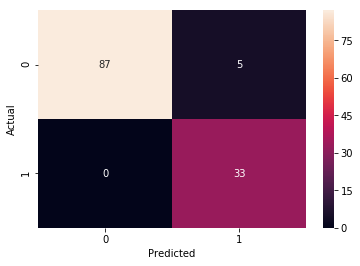

In [52]:
sns.heatmap(cm_log, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy Score = ",accuracy_score(y_test_label, y_pred_log))
print("precision_score: ", precision_score(y_test_label,logmodel.predict(x_test)))
print("recall_score: ", recall_score(y_test_label,logmodel.predict(x_test)))
print("f1_score: ",f1_score(y_test_label,logmodel.predict(x_test)))

Accuracy Score =  0.96
precision_score:  0.868421052631579
recall_score:  1.0
f1_score:  0.9295774647887324


<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

# Applying Support Vector Machine Model: 

In [54]:
from sklearn.svm import SVC
svmmodel = SVC()

In [55]:
svmmodel.fit(x_train,y_train_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [56]:
y_pred_svm = svmmodel.predict(x_test)

In [57]:
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test_label, svmmodel.predict(x_test))

Text(33,0.5,'Actual')

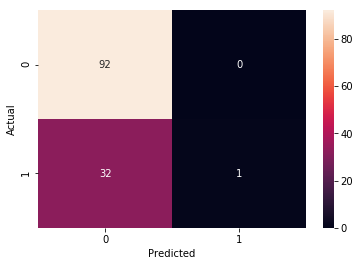

In [58]:
sns.heatmap(cm_svm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [59]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Accuracy Score = ",accuracy_score(y_test_label, y_pred_svm))
print("precision_score: ", precision_score(y_test_label,svmmodel.predict(x_test)))
print("recall_score: ", recall_score(y_test_label,svmmodel.predict(x_test)))
print("f1_score: ",f1_score(y_test_label,svmmodel.predict(x_test)))

Accuracy Score =  0.744
precision_score:  1.0
recall_score:  0.030303030303030304
f1_score:  0.05882352941176471


<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

# Applying Decision Tree Regressor Model:

In [60]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [63]:
y_pred_dt = dt_model.predict(x_test)

In [64]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred_dt))

0.6592109430169224


<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

# Applying KNN Model:

In [65]:
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier

In [66]:
import math
math.sqrt(len(y_test_label))

11.180339887498949

In [67]:
knnc = KNeighborsClassifier(n_neighbors = 11, p=2, metric = 'euclidean')

In [68]:
knnc.fit(x_train, y_train_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [69]:
y_pred_knn = knnc.predict(x_test)

In [70]:
y_pred_knn

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

Text(33,0.5,'Actual')

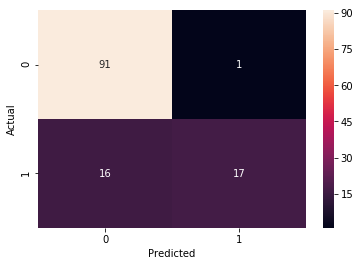

In [71]:
cm = confusion_matrix(y_test_label, y_pred_knn)
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [72]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
print("Accuracy Score = ",accuracy_score(y_test_label, y_pred_knn))
print("precision_score: ", precision_score(y_test_label,knnc.predict(x_test)))
print("recall_score: ", recall_score(y_test_label,knnc.predict(x_test)))
print("f1_score: ",f1_score(y_test_label,knnc.predict(x_test)))

Accuracy Score =  0.864
precision_score:  0.9444444444444444
recall_score:  0.5151515151515151
f1_score:  0.6666666666666666


<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

# Comparision Between Models:

<b>Comparing Regression Models:</b>

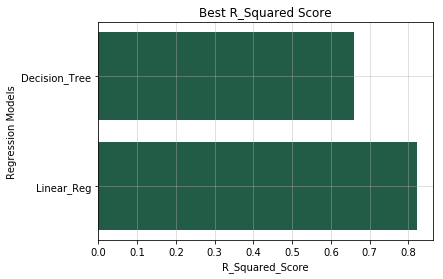

In [76]:
x = ["Linear_Reg","Decision_Tree"]
y = np.array([r2_score(y_test,y_pred_mlr),r2_score(y_test,y_pred_dt)])
plt.barh(x,y, color='#225b46')
plt.xlabel("R_Squared_Score")
plt.ylabel("Regression Models")
plt.title("Best R_Squared Score")
plt.grid(alpha=0.5)
plt.show()

<b>Comparing Regression Models:</b>

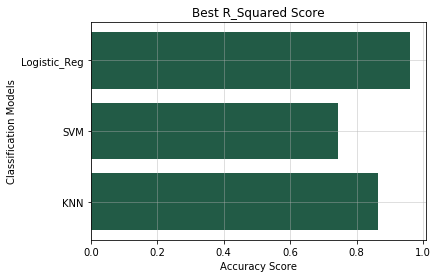

In [77]:
x = ["KNN","SVM","Logistic_Reg"]
y = np.array([accuracy_score(y_test_label, y_pred_knn),accuracy_score(y_test_label, y_pred_svm),accuracy_score(y_test_label, y_pred_log)])
plt.barh(x,y, color='#225b46')
plt.xlabel("Accuracy Score")
plt.ylabel("Classification Models")
plt.title("Best R_Squared Score")
plt.grid(alpha=0.5)
plt.show()

# Conclusion:

<b>By analyzing the data and by applying ML model:</b>
    - In Classification
        - Logistic Regression was better with accuracy score of 96.0%
        - K Nearest Neighbour was better with accuracy score of 86.4%
        - Support Vector Machine was better with accuracy score of 74.4%
        
    - In Regression
        - Linear Regression was better with r_squared score of 82.2%
        - Decision Tree Regressor was better with r_squared score of 65.9%